# Introduction

In [11]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb                            # Package for loading the ecg and annotation


In [12]:
# Importing Data
data = 'C:\\Users\\sesid\\Downloads\\Incart\\files\\'

In [13]:
# List of Patients
patients = [
    'I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10',
    'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20',
    'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30',
    'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40',
    'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50',
    'I51', 'I52', 'I53', 'I54', 'I55', 'I56', 'I57', 'I58', 'I59', 'I60',
    'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70',
    'I71', 'I72', 'I73', 'I74', 'I75']

In [14]:
# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
normal = ['N']

In [15]:
dic = {'N':['N','L','R','B'],
       'S':['A','a','j','S','e','j','n'],
       'V':['V','r','E'],
       'F':['F'],
       'Q':['Q','?','f','/'],
      }

In [16]:
from wfdb import rdrecord
from sklearn import preprocessing

# Load the record (replace '03665' with the actual record name)
record = wfdb.rdrecord(data + 'I01', smooth_frames=True)

# Preprocess the signal
l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:, 0]))


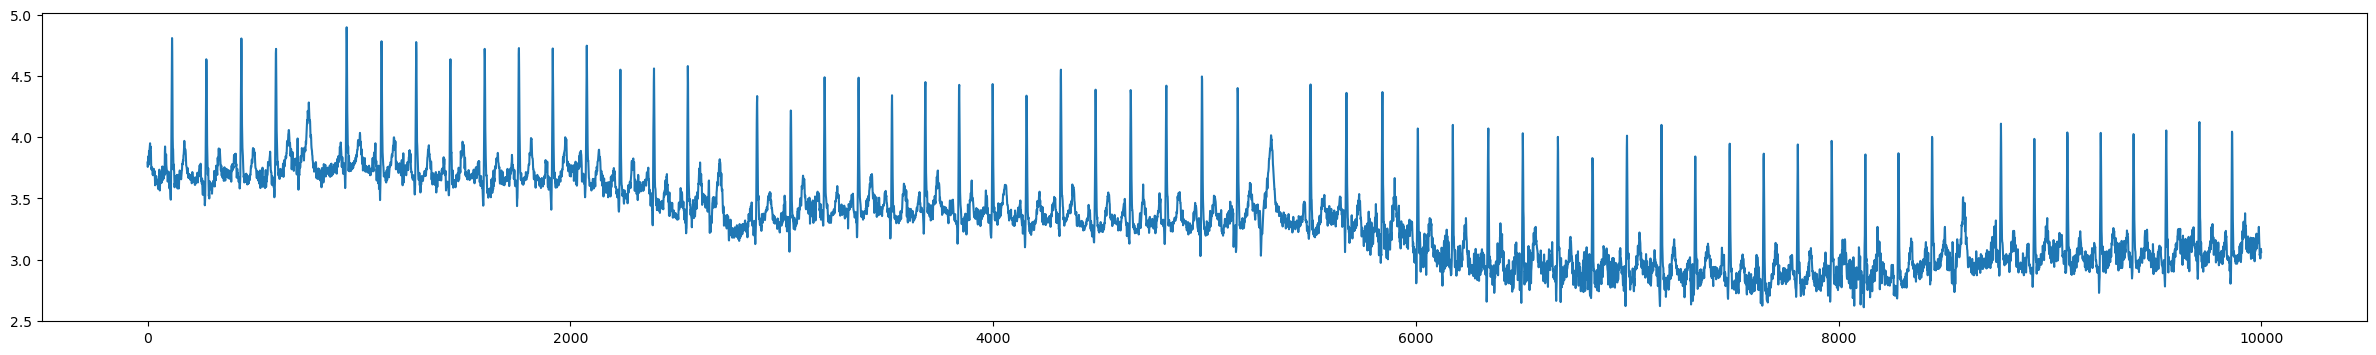

In [17]:
plt.figure(figsize=(30, 4))
plt.plot(record.p_signal[:10000,0])
plt.savefig('ecg.png', format='png', dpi=400)

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))


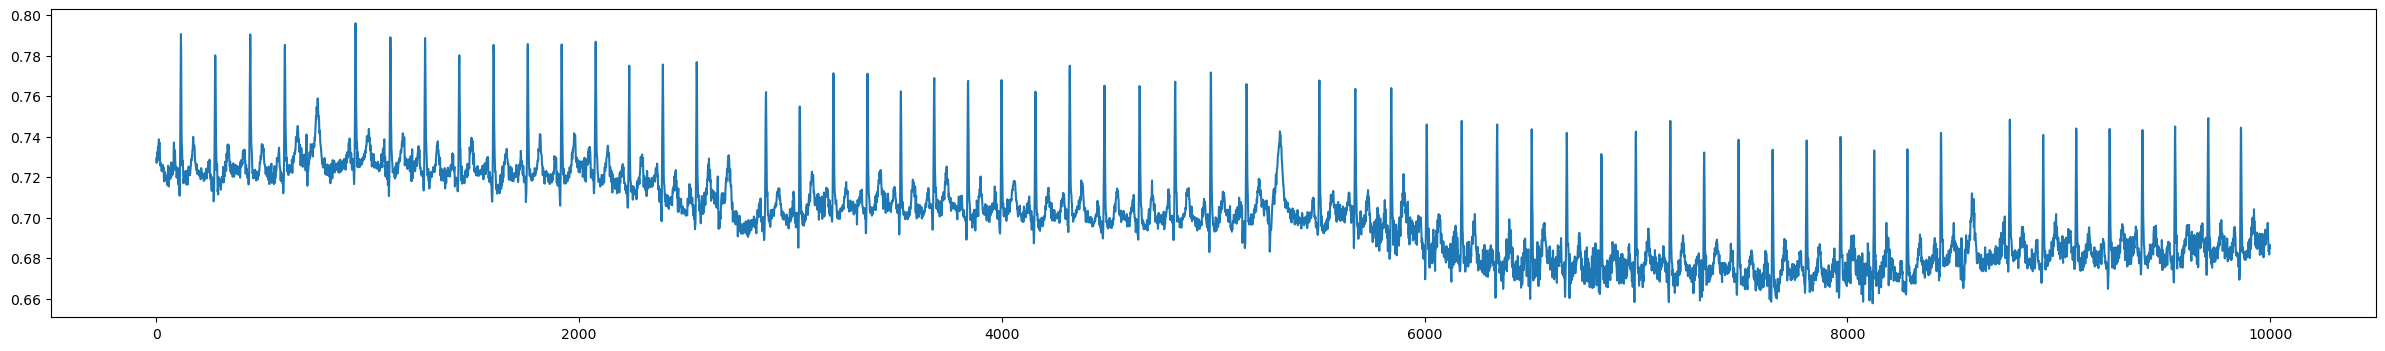

In [19]:

plt.figure(figsize=(30, 4))
plt.plot(lm[:10000])
plt.savefig('ecg_scaled.png', format='png', dpi=400)

In [20]:
# changing the window size 
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

fs = 360
insize = 180

y = []
beat_l2 = []
#beat_v5 = []

for num in patients:
    print('record number',num)
    record = wfdb.rdrecord(data+num,smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))
    #v2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,1]))

    qrs = processing.XQRS(sig = l2,fs = fs)
    qrs.detect()
    peaks = qrs.qrs_inds
      
    
    for peak in peaks[1:-1]:
        start,end = peak-insize//2, peak+insize//2
        ann = wfdb.rdann(data+num,extension='atr', sampfrom = start, sampto = end, 
                         return_label_elements=['symbol'])
        annsymbol =ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl)
                    beat_l2.append(l2[start:end])
                    #beat_v5.append(v5[start:end])

record number I01
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I02
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I03
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I04
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I05
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I06
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Runni

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I49
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I50
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I51
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I52
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number I53
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection..

In [21]:
z= []
for i in range(len(beat_l2)):
    if len(beat_l2[i])!=180:
        z.append(i)
print(z)

[]


In [22]:
df = pd.DataFrame(beat_l2)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,1.706066,1.725324,1.722573,1.696437,1.692310,1.703315,1.692310,1.700564,1.704690,1.692310,...,1.715695,1.699188,1.681306,1.703315,1.714319,1.728075,1.685432,1.688184,1.686808,1.682681
1,1.701939,1.692310,1.706066,1.704690,1.700564,1.715695,1.699188,1.681306,1.703315,1.714319,...,1.692310,1.695061,1.685432,1.697813,1.699188,1.671677,1.684057,1.707441,1.717070,1.679930
2,1.695061,1.704690,1.714319,1.710193,1.688184,1.682681,1.692310,1.695061,1.685432,1.697813,...,1.741831,1.747333,1.755586,1.730826,1.715695,1.732202,1.751459,1.754211,1.755586,1.756962
3,1.717070,1.712944,1.712944,1.707441,1.710193,1.715695,1.699188,1.700564,1.717070,1.733577,...,1.718446,1.723948,1.741831,1.736328,1.747333,1.759713,1.736328,1.725324,1.712944,1.728075
4,1.750084,1.717070,1.728075,1.729450,1.722573,1.718446,1.723948,1.741831,1.736328,1.747333,...,1.708817,1.730826,1.737704,1.732202,1.741831,1.734953,1.739079,1.736328,1.736328,1.733577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161995,2.939040,2.937641,2.934843,2.933444,2.934843,2.933444,2.930645,2.930645,2.927847,2.923650,...,3.161492,3.157295,3.153097,3.144703,3.137708,3.126515,3.113923,3.102731,3.095735,3.085942
161996,2.926448,2.927847,2.929246,2.923650,2.923650,2.925049,2.923650,2.925049,2.926448,2.926448,...,2.864889,2.866288,2.869086,2.871884,2.874683,2.878880,2.884476,2.892871,2.898467,2.902664
161997,2.909659,2.909659,2.909659,2.911058,2.912457,2.909659,2.909659,2.912457,2.913857,2.913857,...,2.869086,2.873284,2.880279,2.885875,2.888673,2.894270,2.901265,2.905462,2.911058,2.915256
161998,2.918054,2.916655,2.915256,2.913857,2.916655,2.916655,2.916655,2.918054,2.918054,2.919453,...,2.878880,2.878880,2.881678,2.885875,2.891471,2.897068,2.901265,2.905462,2.912457,2.919453


In [24]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

le = LabelEncoder()
y_no = le.fit_transform(y)

print(Counter(y))
print(Counter(y_no))

Counter({'N': 145033, 'V': 14797, 'S': 1997, 'F': 168, 'Q': 5})
Counter({1: 145033, 4: 14797, 3: 1997, 0: 168, 2: 5})


In [25]:
df['target']=y_no
df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,target
0,1.706066,1.725324,1.722573,1.696437,1.692310,1.703315,1.692310,1.700564,1.704690,1.692310,...,1.699188,1.681306,1.703315,1.714319,1.728075,1.685432,1.688184,1.686808,1.682681,1
1,1.701939,1.692310,1.706066,1.704690,1.700564,1.715695,1.699188,1.681306,1.703315,1.714319,...,1.695061,1.685432,1.697813,1.699188,1.671677,1.684057,1.707441,1.717070,1.679930,1
2,1.695061,1.704690,1.714319,1.710193,1.688184,1.682681,1.692310,1.695061,1.685432,1.697813,...,1.747333,1.755586,1.730826,1.715695,1.732202,1.751459,1.754211,1.755586,1.756962,1
3,1.717070,1.712944,1.712944,1.707441,1.710193,1.715695,1.699188,1.700564,1.717070,1.733577,...,1.723948,1.741831,1.736328,1.747333,1.759713,1.736328,1.725324,1.712944,1.728075,1
4,1.750084,1.717070,1.728075,1.729450,1.722573,1.718446,1.723948,1.741831,1.736328,1.747333,...,1.730826,1.737704,1.732202,1.741831,1.734953,1.739079,1.736328,1.736328,1.733577,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161995,2.939040,2.937641,2.934843,2.933444,2.934843,2.933444,2.930645,2.930645,2.927847,2.923650,...,3.157295,3.153097,3.144703,3.137708,3.126515,3.113923,3.102731,3.095735,3.085942,4
161996,2.926448,2.927847,2.929246,2.923650,2.923650,2.925049,2.923650,2.925049,2.926448,2.926448,...,2.866288,2.869086,2.871884,2.874683,2.878880,2.884476,2.892871,2.898467,2.902664,1
161997,2.909659,2.909659,2.909659,2.911058,2.912457,2.909659,2.909659,2.912457,2.913857,2.913857,...,2.873284,2.880279,2.885875,2.888673,2.894270,2.901265,2.905462,2.911058,2.915256,1
161998,2.918054,2.916655,2.915256,2.913857,2.916655,2.916655,2.916655,2.918054,2.918054,2.919453,...,2.878880,2.881678,2.885875,2.891471,2.897068,2.901265,2.905462,2.912457,2.919453,1


In [26]:
classes = df['target'].unique()

print("Unique classes in the target column:")
for cls in classes:
    print(cls)

Unique classes in the target column:
1
4
3
0
2


In [27]:
df.to_csv('Incart.csv', index=False)

In [2]:
import wfdb
from wfdb import processing

# Define bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency is half the sampling rate
    low = lowcut / nyquist  # Normalize low cutoff frequency
    high = highcut / nyquist  # Normalize high cutoff frequency
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y



# Parameters for bandpass and notch filters
lowcut = 0.2  # Low cutoff frequency
highcut = 49.5  # High cutoff frequency
fs = 360.0  # Sampling rate of MIT-BIH Arrhythmia Database
order = 4
notch_freq = 60.0  # Notch filter frequency
Q = 30.0  # Quality factor for notch filter

# Importing Data
data = 'C:\\Users\\sesid\\Downloads\\Incart\\files\\'
# List of Patients
patients = [
    'I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10',
    'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20',
    'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30',
    'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40',
    'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50',
    'I51', 'I52', 'I53', 'I54', 'I55', 'I56', 'I57', 'I58', 'I59', 'I60',
    'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70',
    'I71', 'I72', 'I73', 'I74', 'I75']
# Classification based on AAMI
AAMI = ['N', 'L', 'R', 'B', 'A', 'a', 'j', 'S', 'V', 'r', 'F', 'e', 'j', 'n', 'E', 'f', '/', 'Q', '?']
dic = {'N': ['N', 'L', 'R', 'B'],
       'S': ['A', 'a', 'j', 'S', 'e', 'j', 'n'],
       'V': ['V', 'r', 'E'],
       'F': ['F'],
       'Q': ['Q', '?', 'f', '/']}

fs = 257
insize = 180  # Segment size

y = []
beat_l2 = []

for num in patients:
    print('record number', num)
    record = wfdb.rdrecord(data + num, smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:, 0]))

    # Apply the bandpass filter
    l2_filtered = butter_bandpass_filter(l2, lowcut, highcut, fs, order)

    # QRS Detection using gqrs
    gqrs = processing.gqrs_detect(sig=l2_filtered, fs=fs)
    qrs_peaks = processing.correct_peaks(sig=l2_filtered, peak_inds=gqrs, search_radius=fs//10, smooth_window_size=150)

    peaks = qrs_peaks

    for peak in peaks[1:-1]:
        start, end = peak - insize // 2, peak + insize // 2
        ann = wfdb.rdann(data + num, extension='atr', sampfrom=start, sampto=end, return_label_elements=['symbol'])
        annsymbol = ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl)
                    beat_l2.append(l2_filtered[start:end])

z = []
for i in range(len(beat_l2)):
    if len(beat_l2[i]) != insize:  # Ensure all segments have the correct length
        z.append(i)
print(z)

# Remove segments with incorrect length
beat_l2 = [beat for i, beat in enumerate(beat_l2) if i not in z]
y = [label for i, label in enumerate(y) if i not in z]

df = pd.DataFrame(beat_l2)
le = LabelEncoder()
y_no = le.fit_transform(y)

print(Counter(y))
print(Counter(y_no))
df['target'] = y_no

# Save to CSV file
df.to_csv('inc_denoised_ecg_segments.csv', index=False)

classes = df['target'].unique()
print("Unique classes in the target column:")
for cls in classes:
    print(cls)


record number I01
record number I02
record number I03
record number I04
record number I05
record number I06
record number I07
record number I08
record number I09
record number I10
record number I11
record number I12
record number I13
record number I14
record number I15
record number I16
record number I17
record number I18
record number I19
record number I20
record number I21
record number I22
record number I23
record number I24
record number I25
record number I26
record number I27
record number I28
record number I29
record number I30
record number I31
record number I32
record number I33
record number I34
record number I35
record number I36
record number I37
record number I38
record number I39
record number I40
record number I41
record number I42
record number I43
record number I44
record number I45
record number I46
record number I47
record number I48
record number I49
record number I50
record number I51
record number I52
record number I53
record number I54
record number I55
record num